In [8]:
# standard imports
import numpy as np
import pandas as pd

# stats import
from scipy import stats

# graphing imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# inline graphing
%matplotlib inline

# supress IPython notebook warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# view the list of datasets that come with seaborn
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'exercise',
 'flights',
 'gammas',
 'iris',
 'planets',
 'tips',
 'titanic']

In [5]:
# make a data frame from the seaborn flights dataset
df_flights = sns.load_dataset('flights')
df_flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
# pivot this dataframe 
df_flights2 = df_flights.pivot('month', 'year', 'passengers')
df_flights2.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


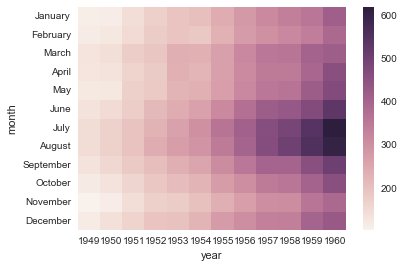

In [9]:
# make a heatmap of this data
sns.heatmap(df_flights2)

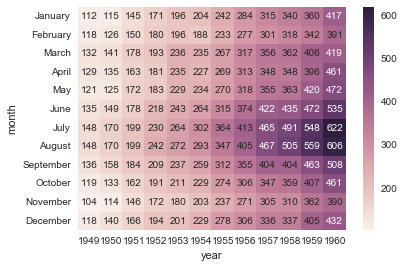

In [12]:
# replot the heatmap with annotations
sns.heatmap(df_flights2, annot = True, fmt = 'd')

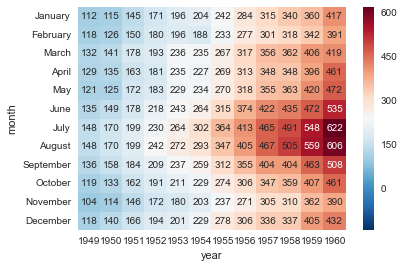

In [14]:
# specify the center for a color scheme
sns.heatmap(df_flights2, annot = True, fmt = 'd', 
            center = df_flights2.loc['January', 1955])

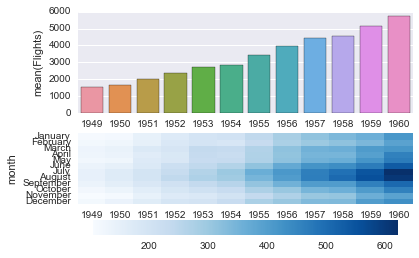

In [28]:
# make a figure with multiple subplots
f, (axis1, axis2) = plt.subplots(2, 1)

yearly_tot_flights = df_flights2.sum()
years = pd.Series(yearly_tot_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_tot_flights.values)
flights = pd.DataFrame(flights)

df_year = pd.concat((years, flights), axis = 1)
df_year.columns = ['Year', 'Flights']

sns.barplot('Year', y = 'Flights', data = df_year, ax = axis1)
sns.heatmap(df_flights2, cmap = 'Blues',
            ax = axis2, cbar_kws = {'orientation':'horizontal'})

A cluster map is like a heat map, but with similar rows near each other. 

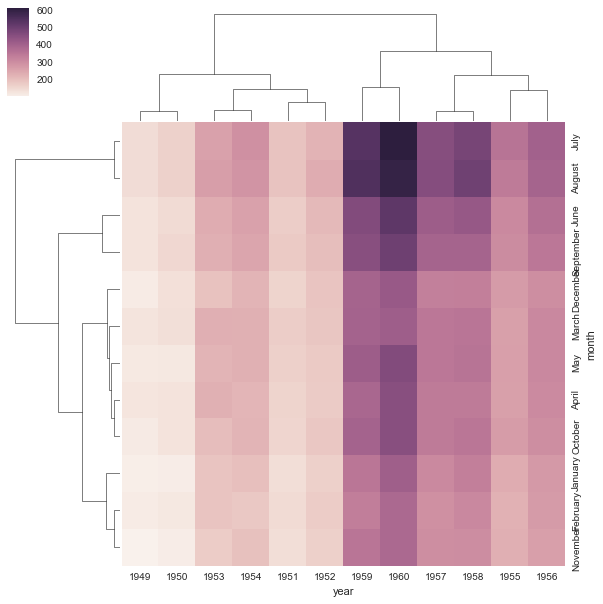

In [29]:
# create a cluster map
sns.clustermap(df_flights2)

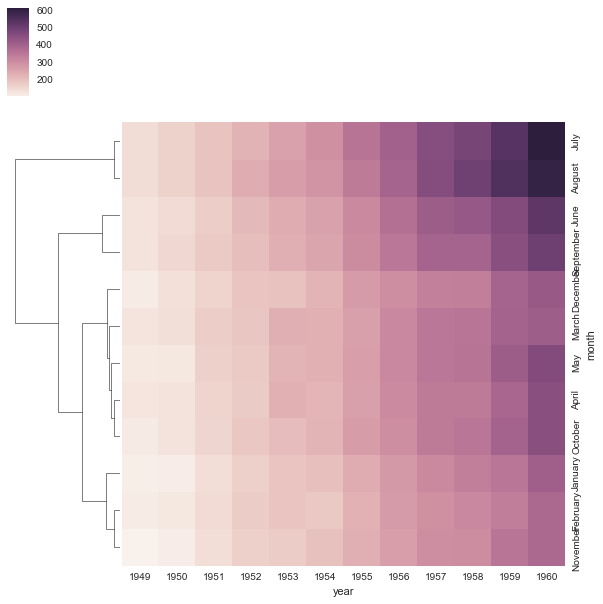

In [30]:
# cluster by the rows only
sns.clustermap(df_flights2, col_cluster = False)

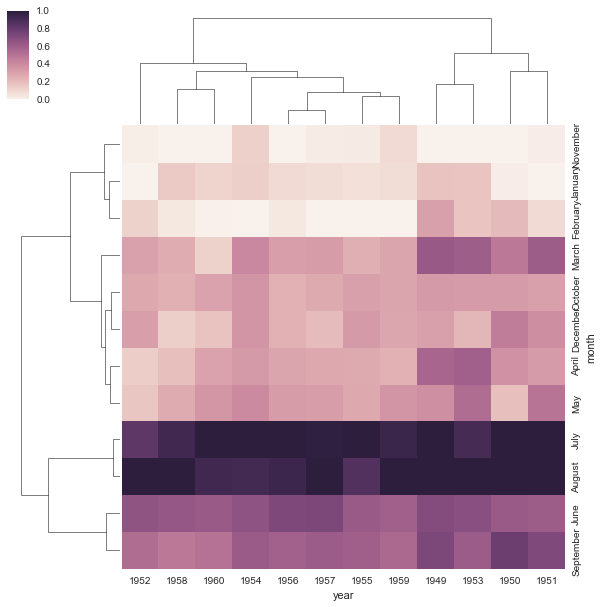

In [31]:
# since the number of flights is increasing years, 
# we can standardize everything within the year
sns.clustermap(df_flights2, standard_scale = 1)

This data now clearly shows that the summer months are when people fly most, by eliminating the year-to-year increase. 

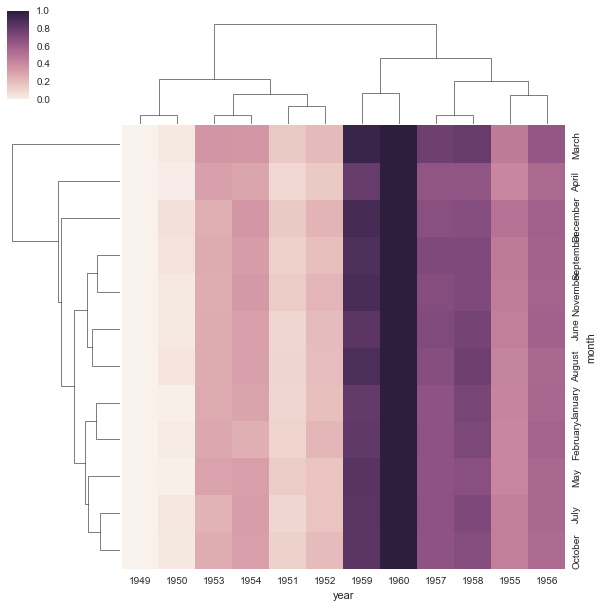

In [32]:
# let's do the same thing, but scaling the rows instead
sns.clustermap(df_flights2, standard_scale = 0)

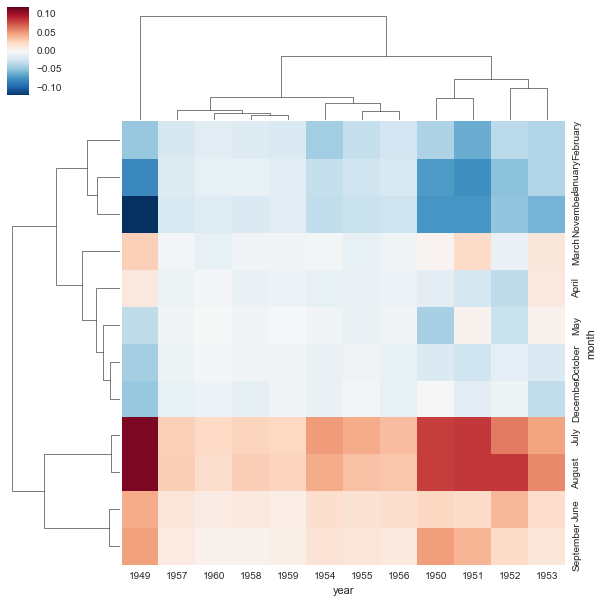

In [33]:
# now let's standardize by the z-score
sns.clustermap(df_flights2, z_score = 1)